# Logistic Regression .2

### Week November 28th, 2020

### Prepared by: Moe Fadae & Najem Bouazza

### Introduction:


In this Tutorial, we will train a logistic regression model to predict if customer is more likely to make a purchase. 

The model will be trained based on 3 key features : Age, Gender, Salary.

This is a binary (binomial) classification : puchase did happen: 1, not purchased : 0

At the end, we will take a look into the results and the metrics used to evaluate the model, and how to manage the threshold 

or the classification boundary.


The data has been retrieved from kaggle. 


## I -  Data Exploration & Preprocessing

In [1]:
#Importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading dataset
dataset = pd.read_csv("purchase.csv")

In [3]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


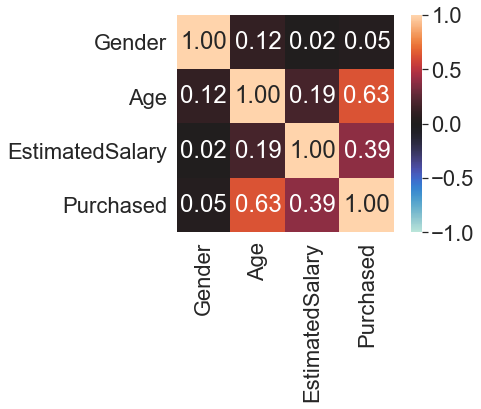

{'corr':                    Gender       Age  EstimatedSalary  Purchased
 Gender           1.000000  0.115287         0.016346   0.045193
 Age              0.115287  1.000000         0.186838   0.629184
 EstimatedSalary  0.016346  0.186838         1.000000   0.388070
 Purchased        0.045193  0.629184         0.388070   1.000000,
 'ax': <AxesSubplot:>}

In [28]:
# You can use NOMINAL class to view the correlation (including the categorical variable) in case dataset.corr() doesn't work

from dython import nominal
nominal.associations(dataset, nominal_columns=['Gender'])

In [29]:
#Checking for missing data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           362 non-null    int64
 1   Age              362 non-null    int64
 2   EstimatedSalary  362 non-null    int64
 3   Purchased        362 non-null    int64
dtypes: int64(4)
memory usage: 14.1 KB


In [30]:
dataset.isna().any().sum()

0

In [31]:
#Properties of data
dataset.describe()

,Gender,Age,EstimatedSalary,Purchased
count,362.000000,362.000000,362.000000,362.000000
mean,0.466851,37.527624,71138.121547,0.378453
std,0.499590,10.685147,35054.334316,0.485673
min,0.000000,18.000000,15000.000000,0.000000
25%,0.000000,29.000000,44000.000000,0.000000
50%,0.000000,37.000000,71000.000000,0.000000
75%,1.000000,46.000000,89000.000000,1.000000
max,1.000000,60.000000,150000.000000,1.000000


In [32]:
#Encode the categorical feature - Gender using LabelEncoder

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

dataset['Gender'] = le.fit_transform(dataset['Gender'])

dataset.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


<AxesSubplot:>

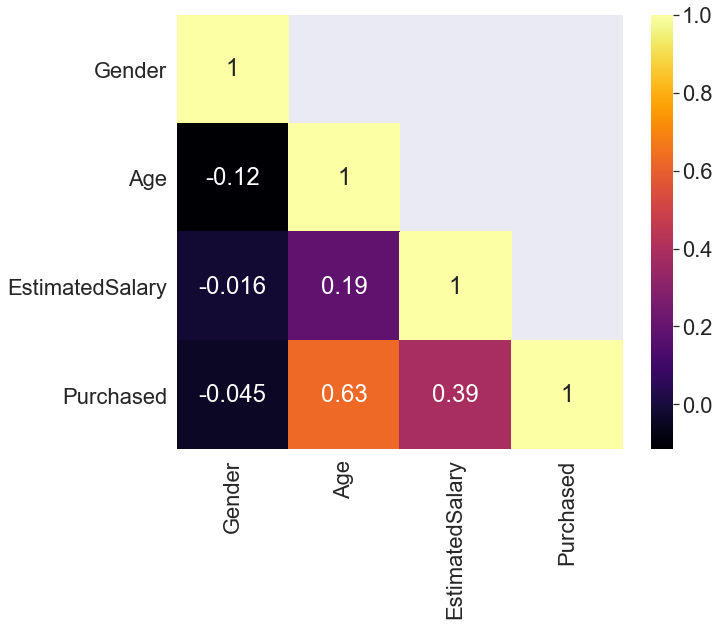

In [33]:
#heatmap - correlation matrix of features
plt.figure(figsize=(10,8))
sns.set( font_scale= 2)
sns.heatmap(dataset.corr(),annot=True,cmap='inferno',mask=np.triu(dataset.corr(),k=1))

In [34]:
dataset.drop("User ID", axis =1, inplace =True)

KeyError: "['User ID'] not found in axis"

In [35]:
dataset.shape

(362, 4)

In [36]:
#checking for duplicate samples
dataset.duplicated().sum()

0

In [37]:
#dropping ALL duplicate values
dataset.drop_duplicates(keep = False, inplace = True)

In [38]:
dataset.shape

(362, 4)

/Users/alexeimarcilio/gbc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/alexeimarcilio/gbc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


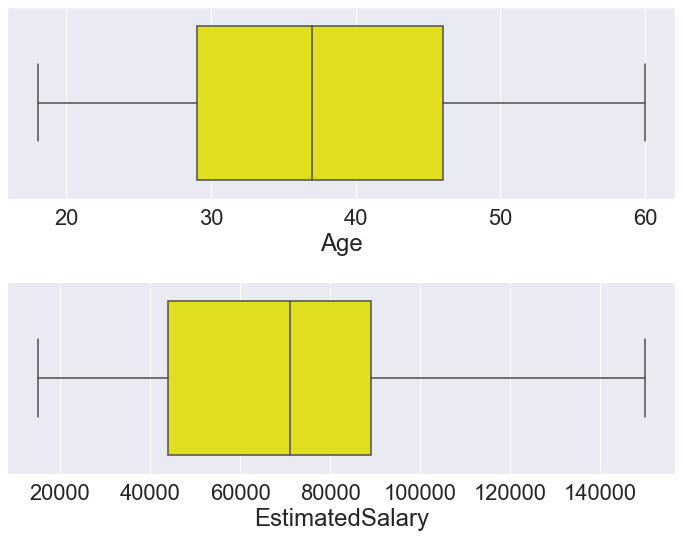

In [39]:
#Checking if any outliers
plt.figure(figsize=(10, 8))

plt.subplot(2,1,1)
sns.boxplot(dataset['Age'],color='yellow')

plt.subplot(2,1,2)
sns.boxplot(dataset['EstimatedSalary'], color='yellow')

plt.tight_layout()

/Users/alexeimarcilio/gbc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Purchased', ylabel='count'>

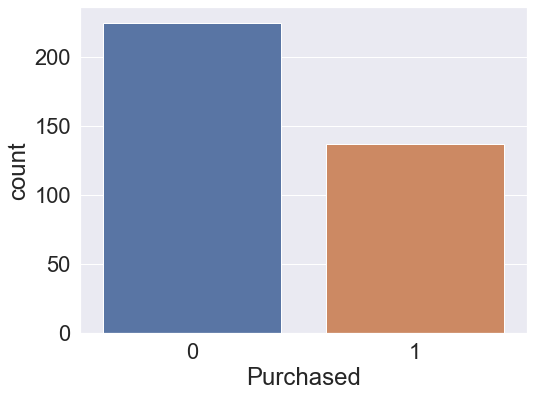

In [40]:
#Output distribution
plt.figure(figsize=(8, 6))
sns.countplot('Purchased', data=dataset)


#### Define X and y, Convert them into arrays

In [17]:
X = dataset.drop("Purchased", axis = 1).values
y = dataset["Purchased"].values

## II -  Train & Evaluate the model

#### Splitting  the data

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#### Feature scaling 

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
print(X_train[:3, :])

[[-0.96263527 -1.37394385  0.3233538 ]
 [-0.96263527  0.12620169  0.1205811 ]
 [-0.96263527  1.81386542 -1.29882782]]


#### Create and fit the model

In [21]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Predictions for X_test

In [22]:
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)

In [23]:
pd.DataFrame(y_pred_proba)


,0,1
0,0.934922,0.065078
1,0.131239,0.868761
2,0.565517,0.434483
3,0.988452,0.011548
4,0.240856,0.759144
...,...,...
68,0.352628,0.647372
69,0.652208,0.347792
70,0.982579,0.017421
71,0.994265,0.005735


#### Changing the classification threshold

In [80]:
def my_filter(x):
    if x > 0.9:
        return 1
    else:
        return 0

In [81]:
y_pred_new = np.array([my_filter(x) for x in y_pred_proba[:,1]])

In [82]:
y_pred_new

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

#### Confusion matrix for the default threshold:

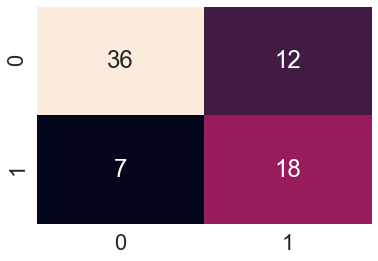

In [83]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cbar = False)

Text(20.5, 0.5, 'Actual Values')

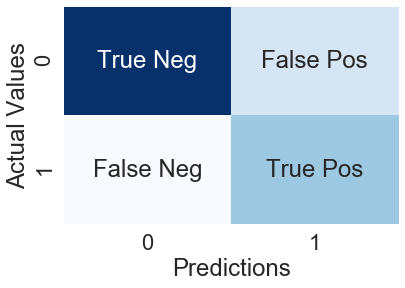

In [84]:
sns.set( font_scale=2)
labels =np.array([['True Neg','False Pos'],['False Neg','True Pos']])
sns.heatmap(confusion_matrix(y_test, y_pred), annot=labels,fmt='', cmap='Blues', cbar = False)

plt.xlabel('Predictions')
plt.ylabel('Actual Values')

#### Definitions :

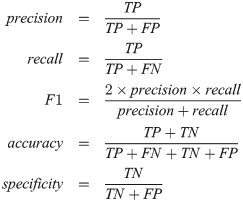

#### Confusion matrix for a new threshold:

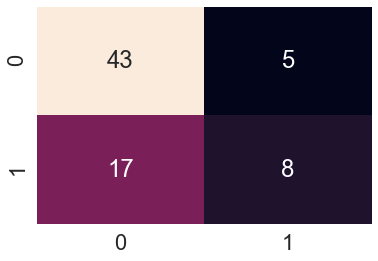

In [85]:
sns.heatmap(confusion_matrix(y_test, y_pred_new), annot=True, cbar = False)

In [86]:
#Metrics based result
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_new))

              precision    recall  f1-score   support

           0       0.72      0.90      0.80        48
           1       0.62      0.32      0.42        25

    accuracy                           0.70        73
   macro avg       0.67      0.61      0.61        73
weighted avg       0.68      0.70      0.67        73



In [87]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.75      0.79        48
           1       0.60      0.72      0.65        25

    accuracy                           0.74        73
   macro avg       0.72      0.73      0.72        73
weighted avg       0.76      0.74      0.74        73



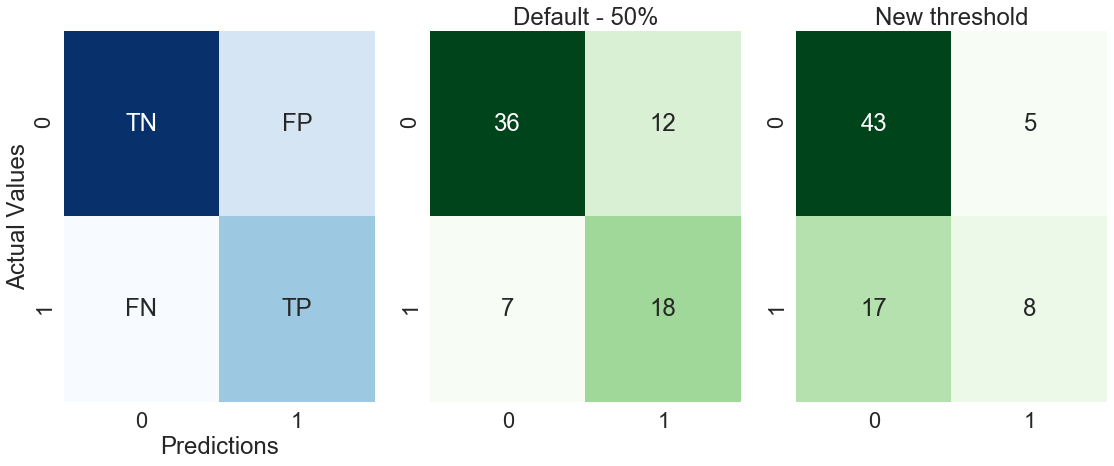

In [88]:
plt.figure(figsize = (16,7))

#Confusion matrix with labels
plt.subplot(1,3,1)
labels =np.array([['TN','FP'],['FN','TP']])
sns.heatmap(confusion_matrix(y_test, y_pred), annot=labels,fmt='', cmap='Blues', cbar = False)
plt.xlabel('Predictions')
plt.ylabel('Actual Values')

#Confusion matrix (0.5)
plt.subplot(1,3,2)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Greens', cbar = False)
plt.title("Default - 50%")

#Confusion matrix (new threshold)
plt.subplot(1,3,3)
sns.heatmap(confusion_matrix(y_test, y_pred_new), annot=True,cmap='Greens', cbar = False)
plt.title("New threshold")


plt.tight_layout()


In [92]:
dataset.head(3)

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0


#### Plotting a sigmoid function and a scatter of data

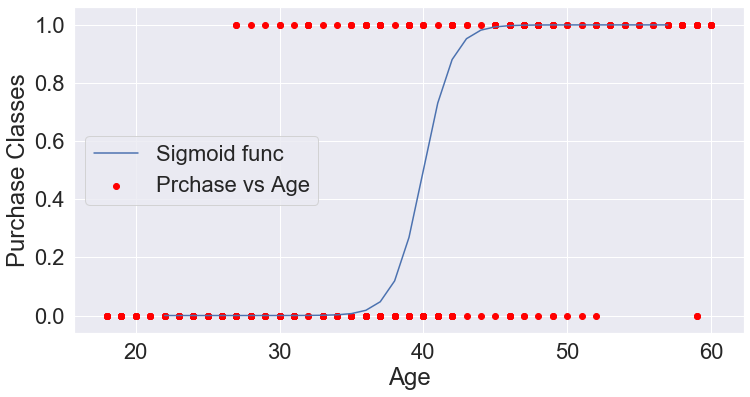

In [119]:
plt.figure(figsize = (12,6))
x = np.arange(-18,18)
plt.plot(x + 40, 1/(1+np.exp(-x)) , label = "Sigmoid func")
plt.scatter(x = dataset["Age"], y = dataset["Purchased"], color = "red" , label = "Prchase vs Age")

plt.xlabel("Age")
plt.ylabel("Purchase Classes")
plt.legend(loc = 6)
#dataset.plot.scatter(x = "EstimatedSalary", y = "Purchased")